<h1 style="font-family: 'Roboto', sans-serif;font-size: 28px;">ChatGPT Review Analysis</h1>

<p style="font-family: 'Merriweather', serif;font-size: 16px;">Analyzing reviews is an effective way to use data to improve products or services. It gives valuable insights into what usersrs think, what issues they encounter, and what additional features they might want.
    
<p style="font-family: 'Merriweather', serif; font-size: 16px;">For this analysis, the dataset includes user reviews of ChatGPT, containing textual feedback, ratings, and review dates, offering a well-rounded view of user experiences.</p>

In [2]:
import pandas as pd
import plotly.graph_objects as go
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import plotly.express as px
import plotly.io as pio
pio.templates.default = 'plotly_white'
import seaborn as sns 

df = pd.read_csv('chatgpt_reviews.csv')

df.head(10)

,Review Id,Review,Ratings,Review Date
0,6fb93778-651a-4ad1-b5ed-67dd0bd35aac,good,5,2024-08-23 19:30:05
1,81caeefd-3a28-4601-a898-72897ac906f5,good,5,2024-08-23 19:28:18
2,452af49e-1d8b-4b68-b1ac-a94c64cb1dd5,nice app,5,2024-08-23 19:22:59
3,372a4096-ee6a-4b94-b046-cef0b646c965,"nice, ig",5,2024-08-23 19:20:50
4,b0d66a4b-9bde-4b7c-8b11-66ed6ccdd7da,"this is a great app, the bot is so accurate to...",5,2024-08-23 19:20:39
5,9cdc3f78-15cd-4e9d-9287-31bc5af496c4,so nice app,5,2024-08-23 19:18:35
6,3c26ee92-4d72-45ee-9242-caab930903ca,"just love this app, or guy",4,2024-08-23 19:14:40
7,f293ed19-688a-42e2-8282-ddd077771a94,great app,1,2024-08-23 19:12:00
8,99af016c-6db2-4f24-9952-cb3bece40be8,Very impressive,5,2024-08-23 19:11:46
9,27dd6ea5-ada3-4795-a297-6faa7d4b6ba2,helps with coding a lot this ai is great for e...,5,2024-08-23 19:11:09


In [3]:
df.isnull().sum()

Review Id      0
Review         6
Ratings        0
Review Date    0
dtype: int64

In [4]:
from textblob import TextBlob

# replace null values with empty strings to not affect the analysis

df['Review'] = df['Review'].astype(str).fillna('')

# define function to determine sentiment polarity, add sentiment labels based on review content 

def get_sentiment(review):
    sentiment= TextBlob(review).sentiment.polarity
    if sentiment > 0:
        return 'Positive'
    if sentiment < 0:
        return 'Negative'
    else:
        return 'Neutral'

# apply sentiment analysis, add a sentiment column to the df

df['Sentiment'] = df['Review'].apply(get_sentiment)
sentiment_distribution = df['Sentiment'].value_counts

<p style="font-family: 'Merriweather', serif;font-size: 16px;">We are going to visualize the distribution of positive, neutral, and negative reviews.</p>

In [5]:
sentiment_counts = df['Sentiment'].value_counts()

In [6]:
print(type(sentiment_counts))  # Should output <class 'pandas.core.series.Series'>
print(sentiment_counts)

<class 'pandas.core.series.Series'>
Sentiment
Positive    150122
Neutral      38450
Negative      8155
Name: count, dtype: int64


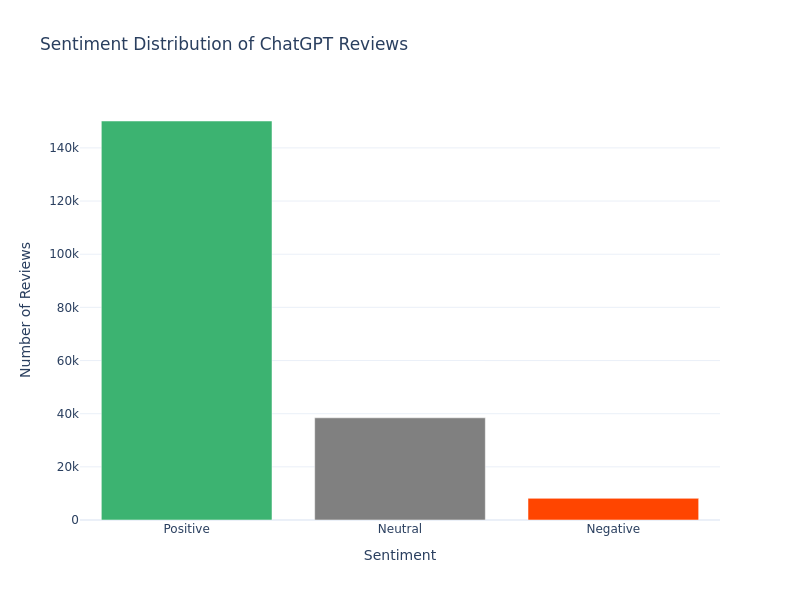

In [13]:
fig = go.Figure(data=[go.Bar(
    x=sentiment_counts.index,
    y=sentiment_counts.values,
    marker_color=['mediumseagreen', 'gray', 'orangered'],
)])

fig.update_layout(
    title='Sentiment Distribution of ChatGPT Reviews',
    xaxis_title='Sentiment', 
    yaxis_title='Number of Reviews', 
    width=800,
    height=600
)

fig.write_image('plot.png', engine='kaleido') # save the fig as a static
from IPython.display import Image
Image(filename='plot.png') #show the plot


<p style="font-family: 'Merriweather', serif;font-size: 16px;">The charts above indicate that overall, users have a favorable opinion of ChatGPT. While neutral and negative reviews make up a smaller proportion, they are still noteworthy. Let’s take a closer look at what users like about ChatGPT.</p>

<h2 style="font-family: 'Roboto', sans-serif;font-size: 24px;">Analyzing what users like about ChatGPT </h2> 
<ul style="font-family: 'Merriweather', serif; font-size: 16px;">
    <li>Filtering the positive reviews.</li>
    <li>Extracting and analyzing the most common phrases and keywords from these positive reviews.</li>
</ul>


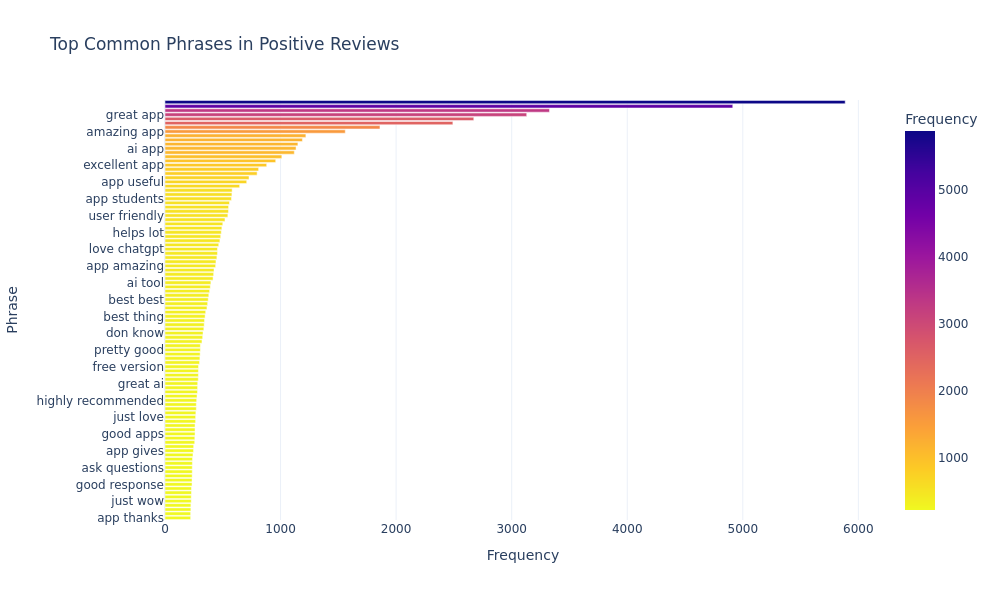

In [14]:
import re

positive_reviews = df[df['Sentiment']== 'Positive']['Review'] #filter the positive reviews

# use CountVectorizer to extract common phrases (n-grams)
vectorizer = CountVectorizer(ngram_range=(2, 3), stop_words='english', max_features=100)
X = vectorizer.fit_transform(positive_reviews)

# sum the counts of each phrase
phrase_counts = X.sum(axis=0)
phrases = vectorizer.get_feature_names_out()
phrase_freq = [(phrases[i], phrase_counts[0, i]) for i in range(len(phrases))]

# sort phrases by frequency
phrase_freq = sorted(phrase_freq, key=lambda x: x[1], reverse=True)

phrase_df = pd.DataFrame(phrase_freq, columns=['Phrase', 'Frequency'])

#choose a color palette 

color_palette = px.colors.sequential.Plasma_r

fig1 = px.bar(phrase_df,
             x='Frequency',
             y='Phrase',
             orientation='h',
             title='Top Common Phrases in Positive Reviews',
             labels={'Phrase': 'Phrase', 'Frequency': 'Frequency'},
             width=1000,
             height=600,
             color=phrase_df['Frequency'],  # Map color to frequency
            color_continuous_scale=color_palette  
)

fig1.update_layout(
    xaxis_title='Frequency',
    yaxis_title='Phrase',
    yaxis={'categoryorder':'total ascending',}
)


fig1.write_image('plot1.png', engine='kaleido') # save the fig as a static
Image(filename='plot1.png') #show the plot


<p style="font-family: 'Merriweather', serif; font-size: 16px;">The visualization indicates that users regard ChatGPT as a "great app," frequently using terms like "amazing app," "AI app," and "excellent app" in their positive reviews. Users find it to be "useful," "user-friendly," and particularly helpful for students, often praising its AI capabilities with comments such as "good AI" and "nice AI." Many users express appreciation for the app’s free version.

<p style="font-family: 'Merriweather', serif; font-size: 16px;">These sentiments suggest that ChatGPT is highly valued for its usability, educational benefits, and robust AI features.</p>

<h2 style="font-family: 'Roboto', sans-serif;font-size: 24px;">Analyzing what users like about ChatGPT </h2> 
<ul style="font-family: 'Merriweather', serif; font-size: 16px;">
    <li>Filtering the negative reviews.</li>
    <li>Extracting and analyzing the most common phrases and keywords from these negative reviews.</li>
</ul>


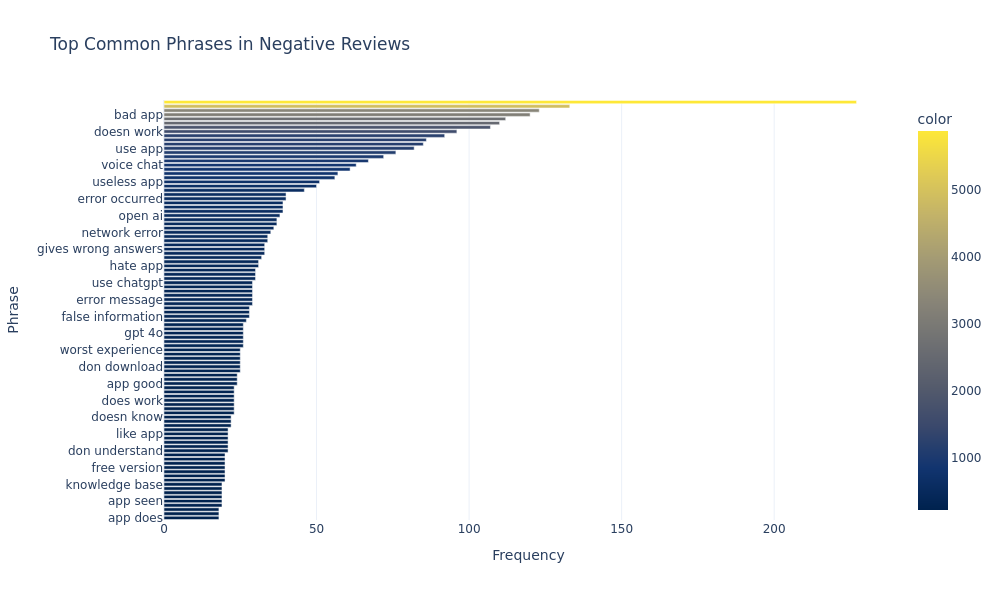

In [15]:
# filter reviews with negative sentiment
negative_reviews = df[df['Sentiment'] == 'Negative']['Review']

# use CountVectorizer to extract common phrases (n-grams) for negative reviews
X_neg = vectorizer.fit_transform(negative_reviews)

# sum the counts of each phrase in negative reviews
phrase_counts_neg = X_neg.sum(axis=0)
phrases_neg = vectorizer.get_feature_names_out()
phrase_freq_neg = [(phrases_neg[i], phrase_counts_neg[0, i]) for i in range(len(phrases_neg))]

# sort phrases by frequency
phrase_freq_neg = sorted(phrase_freq_neg, key=lambda x: x[1], reverse=True)

phrase_neg_df = pd.DataFrame(phrase_freq_neg, columns=['Phrase', 'Frequency'])

# choose a color palette 

color_palette = px.colors.sequential.Cividis

fig2 = px.bar(phrase_neg_df,
             x='Frequency',
             y='Phrase',
             orientation='h',
             title='Top Common Phrases in Negative Reviews',
             labels={'Phrase': 'Phrase', 'Frequency': 'Frequency'},
             width=1000,
             height=600,
             color=phrase_df['Frequency'],  # Map color to frequency
            color_continuous_scale=color_palette 
)

fig2.update_layout(
    xaxis_title='Frequency',
    yaxis_title='Phrase',
    yaxis={'categoryorder':'total ascending'}
)

fig2.write_image('plot2.png', engine='kaleido') # save the fig as a static
Image(filename='plot2.png') #show the plot


<p style="font-family: 'Merriweather', serif; font-size: 16px;">The visualization highlights that users often label ChatGPT as a “bad app” or “useless app”, with common complaints including “doesn’t work”, “error occurred”, and “network error”. Many users also express frustration over incorrect or misleading answers, particularly referencing “false information”. Technical issues like “error messages,” and challenges with specific features, such as “voice chat”. 

<p style="font-family: 'Merriweather', serif; font-size: 16px;">These issues indicate that users are dissatisfied with the app's reliability, accuracy, and overall performance.</p>

<h2 style="font-family: 'Roboto', sans-serif; font-size: 24px;"> Common Problems Faced by Users in ChatGPT</h2>

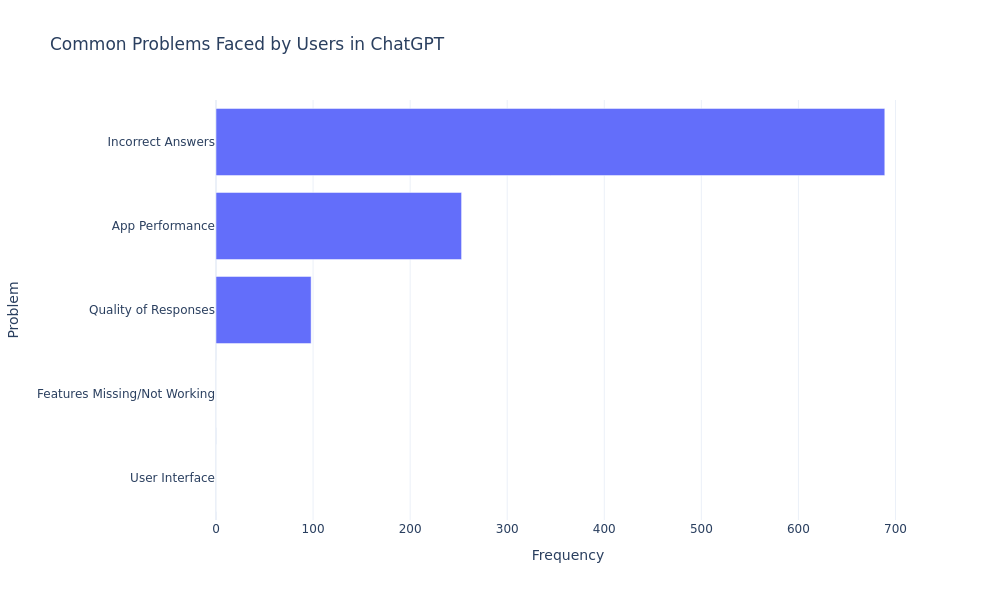

In [16]:
# grouping similar phrases into broader problem categories
problem_keywords = {
    'Incorrect Answers': ['wrong answer', 'gives wrong', 'incorrect', 'inaccurate', 'wrong'],
    'App Performance': ['slow', 'lag', 'crash', 'bug', 'freeze', 'loading', 'glitch', 'worst app', 'bad app', 'horrible', 'terrible'],
    'User Interface': ['interface', 'UI', 'difficult to use', 'confusing', 'layout'],
    'Features Missing/Not Working': ['feature missing', 'not working', 'missing', 'broken', 'not available'],
    'Quality of Responses': ['bad response', 'useless', 'poor quality', 'irrelevant', 'nonsense', 'false information']
}

# initialize a dictionary to count problems
problem_counts = {key: 0 for key in problem_keywords.keys()}

# count occurrences of problem-related phrases in negative reviews
for phrase, count in phrase_freq_neg:
    for problem, keywords in problem_keywords.items():
        if any(keyword in phrase for keyword in keywords):
            problem_counts[problem] += count
            break

problem_df = pd.DataFrame(list(problem_counts.items()), columns=['Problem', 'Frequency'])

fig3 = px.bar(problem_df,
             x='Frequency',
             y='Problem',
             orientation='h', 
             title='Common Problems Faced by Users in ChatGPT',
             labels={'Problem': 'Problem', 'Frequency': 'Frequency'},
             width=1000,
             height=600)

fig3.update_layout(
    plot_bgcolor='white',  
    paper_bgcolor='white', 
    xaxis_title='Frequency',
    yaxis_title='Problem',
    yaxis={'categoryorder':'total ascending'}  
)

fig3.write_image('plot3.png', engine='kaleido') # save the fig as a static
Image(filename='plot3.png') #show the plot


<p style="font-family: 'Merriweather', serif; font-size: 16px;">The visualization shows that the primary issue users encounter with ChatGPT is receiving “Incorrect Answers”, which is the most frequently reported problem by a considerable margin. Other significant concerns include “App Performance”, where users report functionality issues, and worries about the “Quality of Responses”.

<p style="font-family: 'Merriweather', serif; font-size: 16px;">These findings highlights areas where improvements could be made to enhance the user experience with ChatGPT.</p>

<h2 style="font-family: 'Roboto', sans-serif; font-size: 24px;"> How Reviews Change Over Time </h2>

<ul style="font-family: 'Merriweather', serif; font-size: 16px;">
    <li>Aggregate the reviews by their sentiment (Positive, Neutral, Negative) over time.</li>
    <li>Visualize the trends in the volume of each sentiment type over time.</li>
</ul>

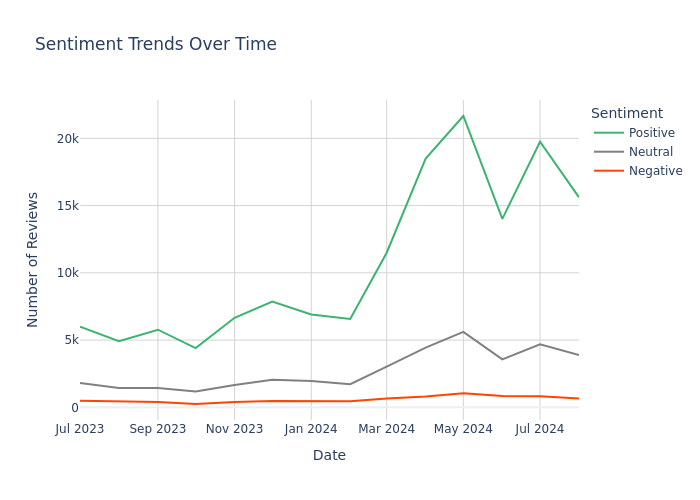

In [18]:
# convert 'Review Date' to datetime format
df['Review Date'] = pd.to_datetime(df['Review Date'])

# aggregate sentiment counts by date
sentiment_over_time = df.groupby([df['Review Date'].dt.to_period('M'), 'Sentiment']).size().unstack(fill_value=0)

# convert the period back to datetime for plotting
sentiment_over_time.index = sentiment_over_time.index.to_timestamp()

fig4 = go.Figure()

fig4.add_trace(go.Scatter(x=sentiment_over_time.index, y=sentiment_over_time['Positive'],
                         mode='lines', name='Positive', line=dict(color='mediumseagreen')))
fig4.add_trace(go.Scatter(x=sentiment_over_time.index, y=sentiment_over_time['Neutral'],
                         mode='lines', name='Neutral', line=dict(color='gray')))
fig4.add_trace(go.Scatter(x=sentiment_over_time.index, y=sentiment_over_time['Negative'],
                         mode='lines', name='Negative', line=dict(color='orangered')))

fig4.update_layout(
    title='Sentiment Trends Over Time',
    xaxis_title='Date',
    yaxis_title='Number of Reviews',
    plot_bgcolor='white',  
    paper_bgcolor='white',  
    legend_title_text='Sentiment',
    xaxis=dict(showgrid=True, gridcolor='lightgray'), 
    yaxis=dict(showgrid=True, gridcolor='lightgray')
)

fig4.write_image('plot4.png', engine='kaleido') # save the fig as a static
Image(filename='plot4.png') #show the plot


<h2 style="font-family: 'Roboto', sans-serif; font-size: 24px;"> How Often Users Promote ChatGPT </h2>

<p style="font-family: 'Merriweather', serif; font-size: 16px;">
    To conclude our analysis of ChatGPT reviews, we will examine how frequently users recommend ChatGPT by utilizing the Net Promoter Score (NPS) concept. NPS is a widely used metric for assessing customer satisfaction and loyalty, based on users' likelihood to recommend a product or service. It is typically calculated from responses to the question: “How likely are you to recommend our product to a friend or colleague?” on a scale of 0 to 10. The NPS calculation involves the following classifications:
    <br><br>
    - <strong>Promoters:</strong> Respondents who give a score of 9 or 10.<br>
    - <strong>Passives:</strong> Respondents who score between 7 and 8.<br>
    - <strong>Detractors:</strong> Respondents who rate between 0 and 6.<br>
    <br>
    The formula for NPS is as follows:
    <br>
    <strong>NPS = %Promoters - %Detractors</strong>
    <br><br>
    For this analysis, I will assume that users who rate the app with 5 stars are classified as Promoters, those with 4 stars as Passives, and those who rate it 3 stars or below as Detractors. Let’s calculate the NPS based on these assumptions.
</p>

In [12]:
# define the categories based on the ratings
df['NPS Category'] = df['Ratings'].apply(lambda x: 'Promoter' if x == 5 else ('Passive' if x == 4 else 'Detractor'))

# calculate the percentage of each category
nps_counts = df['NPS Category'].value_counts(normalize=True) * 100

# calculate NPS
nps_score = nps_counts.get('Promoter', 0) - nps_counts.get('Detractor', 0)

# display the NPS Score
nps_score

np.float64(64.35313912172705)

<p style="font-family: 'Merriweather', serif; font-size: 16px;"> NPS scores are derived from a single-question survey and reported on a scale from -100 to +100. Based on the ratings in the dataset, the calculated NPS is approximately 64.35. This score suggests a strong likelihood that users would recommend ChatGPT to others, as a score above 50 is typically regarded as excellent.</p>

<h1 style="font-family: 'Roboto', sans-serif; font-size: 28px;">Conclusion: </h1>

<p style="font-family: 'Merriweather', serif; font-size: 16px;"> In conclusion, the analysis of ChatGPT reviews reveals a generally positive sentiment among users, who appreciate its functionality, user-friendliness, and AI capabilities. However, there are areas for improvement, particularly regarding the frequency of incorrect answers and app performance issues. The Net Promoter Score (NPS) indicates a strong likelihood of user recommendations, suggesting overall satisfaction. By addressing these issues, developers can enhance user experience and strengthen ChatGPT's effectiveness as a tool. Continuous feedback monitoring will be crucial for ongoing improvements. </p>


<small style="font-family: 'Merriweather', serif; font-size:14px;">***Source : https://statso.io/***</small>
